# LESSON 6: SEABORN INTRODUCTION - SOLUTION
<img src="../images/sb_logo.png" width="400px"/>

## Homework
Note:
- We use the daily historical sales data from previous lecture in this homework. (Use this [link](https://drive.google.com/file/d/1R83MNlUShY55i3CzlXpMAMcxnEg4Hruw/view) to download this dataset)
- All figures must have title, label and legend.
- Instead of using only matplotlib, we use both matplotlib and seaborn for this homerwork.

### Exercise 1:
Randomly choose 3 shops, use `one line plot figure` to show the total turnover of them each month over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)
### Exercise 2:
Randomly choose 1 item, use `one combo figure with bar plot and line plot` to show the sales and the turnover of it over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)
### Exercise 3:
Randomly choose 3 items, use `one bar plot figure` to show the sales of them in 3 years 2013, 2014, and 2015.
### Exercise 4:
Randomly choose 1 shop, use `stack plot figure` to show the contribution of turnover of each item each month over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)
### Exercise 5:
Randomly choose 1 shop, use `pie plot figure` to show the contribution of turnover (in percent) of each item in 3 years 2013, 2014, and 2015. (1 pie plot figure for each year, use `subplots` to put all 3 figures together)
### Exercise 6:
Randomly choose 1 item, use `histogram figure` to show the distribution of sales of the item over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

## Solution

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from tqdm import tqdm

sns.set()

In [2]:
sales_df = pd.read_csv('../data/predict_future_sales/sales.csv')
sales_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
0,02.01.2013,0,59,22154,999.00,1.0
1,03.01.2013,0,25,2552,899.00,1.0
2,05.01.2013,0,25,2552,899.00,-1.0
3,06.01.2013,0,25,2554,1709.05,1.0
4,15.01.2013,0,25,2555,1099.00,1.0
...,...,...,...,...,...,...
2935844,10.10.2015,33,25,7409,299.00,1.0
2935845,09.10.2015,33,25,7460,299.00,1.0
2935846,14.10.2015,33,25,7459,349.00,1.0
2935847,22.10.2015,33,25,7440,299.00,1.0


### Exercise 1:
Randomly choose 3 shops, use `one line plot figure` to show the total turnover of them each month over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [3]:
# Randomly choose 3 shops
np.random.seed(1)
random_shop_id = np.random.choice(sales_df.shop_id.unique(), size=3)
random_shop_id

array([52, 46,  4])

In [4]:
# Get data of three random shop_id
random_shop_df = sales_df[np.isin(sales_df.shop_id, random_shop_id)]
random_shop_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
30072,12.01.2013,0,4,5605,489.3,1.0
30073,03.01.2013,0,4,5587,199.0,1.0
30074,27.01.2013,0,4,5588,149.0,1.0
30075,21.01.2013,0,4,5613,6190.0,1.0
30076,08.01.2013,0,4,5627,2390.0,1.0
...,...,...,...,...,...,...
2918122,28.10.2015,33,4,1586,5999.0,1.0
2918123,05.10.2015,33,4,1523,799.0,1.0
2918124,03.10.2015,33,4,1535,1999.0,1.0
2918125,01.10.2015,33,4,1325,449.0,1.0


In [5]:
# Group sale dataframe by `shop_id` and `date_block_num`
sales_group_shop_df = random_shop_df.groupby(by=['shop_id', 'date_block_num'])

In [6]:
def cal_turnover(grouped_df):
    '''
    Input: each grouped dataframe
    Output: Total turnover of each group
    '''
    price, num_items = grouped_df['item_price'], grouped_df['item_cnt_day']
    return np.sum(price * num_items)

In [7]:
# Apply `cal_turnover` function for each group
# Reset index to create new df
# Rename calculated value column as `total_turnover`
turnover_shop_df = sales_group_shop_df.apply(cal_turnover).reset_index(name='total_turnover')
turnover_shop_df

,shop_id,date_block_num,total_turnover
0,4,0,1433666.0
1,4,1,1532115.0
2,4,2,1415445.5
3,4,3,202647.0
4,4,4,917357.0
...,...,...,...
97,52,29,918807.0
98,52,30,771967.0
99,52,31,774314.0
100,52,32,1297043.0


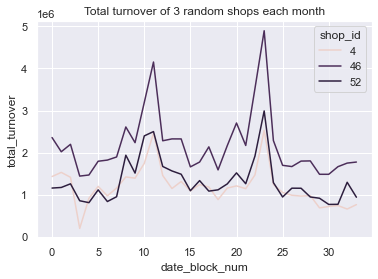

In [8]:
# Plot the figure
sns.lineplot(x='date_block_num', y='total_turnover', hue='shop_id', data=turnover_shop_df)
plt.title('Total turnover of 3 random shops each month')
plt.show()

### Exercise 2:
Randomly choose 1 item, use `one combo figure with bar plot and line plot` to show the sales and the turnover of it over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [9]:
# Randomly choose 1 item
np.random.seed(1)
random_item_id = np.random.choice(sales_df.item_id.unique(), size=1)
random_item_id

array([970])

In [10]:
# Get data of the random item_id
random_item_df = sales_df[sales_df.item_id == random_item_id[0]]
random_item_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
636,02.01.2013,0,25,970,279.0,1.0
2394,08.01.2013,0,24,970,279.0,1.0
2395,26.01.2013,0,24,970,279.0,1.0
10043,12.01.2013,0,19,970,279.0,1.0
13269,27.01.2013,0,21,970,279.0,1.0
...,...,...,...,...,...,...
2890056,28.10.2015,33,35,970,331.0,1.0
2892229,03.10.2015,33,38,970,349.0,1.0
2902698,15.10.2015,33,49,970,349.0,1.0
2908977,17.10.2015,33,16,970,349.0,1.0


In [11]:
# Group sale dataframe by `date_block_num`
sales_group_date_df = random_item_df.groupby(by=['date_block_num'])
sales_group_date_df

In [12]:
# Use `agg` to calcuate number of item each date_block_num
sales_item_df = sales_group_date_df.agg({'item_cnt_day': sum}).reset_index()
sales_item_df

,date_block_num,item_cnt_day
0,0,14.0
1,1,6.0
2,2,27.0
3,3,21.0
4,4,27.0
5,5,30.0
6,6,22.0
7,7,5.0
8,8,9.0
9,9,1.0


In [13]:
# Apply `cal_turnover` function for each group
# Reset index to create new df
# Rename calculated value column as `total_turnover`
turnover_item_df = sales_group_date_df.apply(cal_turnover).reset_index(name='total_turnover')
turnover_item_df

,date_block_num,total_turnover
0,0,3906.00
1,1,1556.00
2,2,7533.00
3,3,5859.00
4,4,7533.00
5,5,8370.00
6,6,6020.00
7,7,1395.00
8,8,2511.00
9,9,279.00


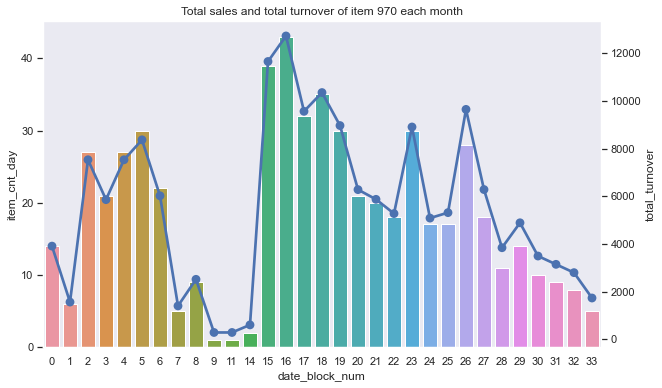

In [14]:
# Plot the figure
sns.set_style('dark')
fig, ax_1 = plt.subplots(figsize=(10, 6))
ax_2 = ax_1.twinx()
sns.barplot(ax=ax_1, x='date_block_num', y='item_cnt_day', data=sales_item_df)
sns.pointplot(ax=ax_2, x='date_block_num', y='total_turnover', data=turnover_item_df)

plt.title(f'Total sales and total turnover of item {random_item_id[0]} each month')
plt.show()

### Exercise 3:
Randomly choose 3 items, use `one bar plot figure` to show the sales of them in 3 years 2013, 2014, and 2015.

In [15]:
# Randomly choose 3 items
np.random.seed(0)
random_item_id = np.random.choice(sales_df.item_id.unique(), size=3)
random_item_id

array([11484, 15044, 16718])

In [16]:
# Process `date` to get the year
new_date_sales_df = sales_df.copy()
new_date_sales_df['date'] = new_date_sales_df.date.apply(lambda x: x.split('.')[-1])

In [17]:
# Get data of the random item_ids
random_item_df = new_date_sales_df[np.isin(new_date_sales_df.item_id, random_item_id)]
random_item_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
6770,2013,0,25,11484,149.0,1.0
6771,2013,0,25,11484,149.0,1.0
10734,2013,0,19,11484,149.0,2.0
10735,2013,0,19,11484,149.0,1.0
16190,2013,0,28,11484,149.0,1.0
...,...,...,...,...,...,...
2837562,2015,32,38,15044,298.0,1.0
2843132,2015,32,57,11484,99.0,1.0
2847676,2015,32,51,11484,90.0,1.0
2868766,2015,32,31,11484,99.0,1.0


In [18]:
# Group by `date` and `item_id` to get item_count each year
grouped_item_df = random_item_df.groupby(by=['date', 'item_id']).agg({'item_cnt_day': sum})
grouped_item_df = grouped_item_df.reset_index()
grouped_item_df

,date,item_id,item_cnt_day
0,2013,11484,653.0
1,2013,15044,4988.0
2,2013,16718,1.0
3,2014,11484,173.0
4,2014,15044,661.0
5,2015,11484,99.0
6,2015,15044,75.0


In [19]:
def fill_missing_value(df, year_list):
    for year in year_list:
        if len(df[df.date == year]) == 0:
            data={
                'date': year,
                'item_id': df.item_id.values[0],
                'item_cnt_day': 0
            }
            df = df.append(data, ignore_index=True)
    df = df.sort_values(by='date')
    return df

In [20]:
year_list = ['2013', '2014', '2015']
x_axis = np.arange(len(year_list)).astype(float)

new_df_list = []
for index, item_id in enumerate(random_item_id):
    df = grouped_item_df[grouped_item_df.item_id == item_id]
    df = fill_missing_value(df, year_list)
    print(df)
    new_df_list.append(df)

new_df = pd.concat(new_df_list)
new_df

   date  item_id  item_cnt_day
0  2013    11484         653.0
3  2014    11484         173.0
5  2015    11484          99.0
   date  item_id  item_cnt_day
1  2013    15044        4988.0
4  2014    15044         661.0
6  2015    15044          75.0
   date  item_id  item_cnt_day
0  2013    16718           1.0
1  2014    16718           0.0
2  2015    16718           0.0


,date,item_id,item_cnt_day
0,2013,11484,653.0
3,2014,11484,173.0
5,2015,11484,99.0
1,2013,15044,4988.0
4,2014,15044,661.0
6,2015,15044,75.0
0,2013,16718,1.0
1,2014,16718,0.0
2,2015,16718,0.0


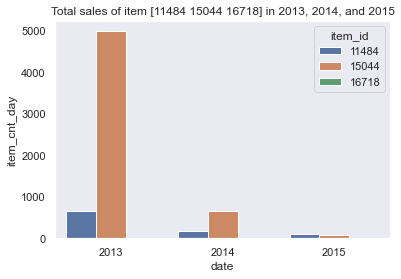

In [21]:
sns.barplot(x='date', y='item_cnt_day', hue='item_id', data=new_df)
plt.title(f'Total sales of item {random_item_id} in 2013, 2014, and 2015')
plt.show()

### Exercise 4:
Randomly choose 1 shop, use `stack plot figure` to show the contribution of turnover of each item each month over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [22]:
# Randomly choose 1 shop
np.random.seed(2)
random_shop_id = np.random.choice(sales_df.shop_id.unique(), size=1)
random_shop_id

array([38])

In [23]:
# Get data of random shop_id
random_shop_df = new_date_sales_df[np.isin(new_date_sales_df.shop_id, random_shop_id)]
random_shop_df

,date,date_block_num,shop_id,item_id,item_price,item_cnt_day
102088,2013,0,38,22154,999.0,1.0
102089,2013,0,38,22151,399.0,1.0
102090,2013,0,38,22134,399.0,1.0
102091,2013,0,38,22134,399.0,1.0
102092,2013,0,38,22134,399.0,1.0
...,...,...,...,...,...,...
2893353,2015,33,38,20367,1899.0,1.0
2893354,2015,33,38,20393,1999.0,1.0
2893355,2015,33,38,20405,2399.0,1.0
2893356,2015,33,38,20428,1599.0,1.0


In [24]:
# Group sale dataframe by `item_id` and `date_block_num`
sales_group_shop_df = random_shop_df.groupby(by=['item_id', 'date_block_num'])
# Apply `cal_turnover` function for each group
# Reset index to create new df
# Rename calculated value column as `total_turnover`
sales_group_shop_df = sales_group_shop_df.apply(cal_turnover).reset_index(name='total_turnover')
sales_group_shop_df

,item_id,date_block_num,total_turnover
0,28,2,398.0
1,30,1,3192.0
2,30,2,798.0
3,30,7,399.0
4,30,11,169.0
...,...,...,...
26104,22167,18,299.0
26105,22167,19,299.0
26106,22167,21,598.0
26107,22167,27,598.0


In [63]:
temp_group_df = sales_group_shop_df.groupby(by='item_id')
temp_group_df

In [83]:
new_data = dict()

for group in temp_group_df:
    if len(group[1]) == 34:
#         print(group)
        new_data[group[0]] = group[1].total_turnover.values
        
new_data

{3076: array([ 6994.5 ,  7871.36,  4653.4 ,  4595.  ,   799.  ,  1598.  ,
         1598.  ,  6072.48,  1598.  ,  2397.  ,  2397.  ,  3196.  ,
         6392.  ,  6005.63,  2397.  ,  3196.  ,  3036.  ,  2317.  ,
         1598.  ,  5637.44,  4516.19,  3995.  ,  4794.  , 10307.1 ,
         3596.  ,  2398.  ,  7194.  ,  2398.  ,  2398.  ,  3597.  ,
         4796.  ,  1199.  ,  3596.5 ,  2398.  ]),
 7894: array([ 5214.5,  5662. ,  8642. ,  2980. ,  1490. ,  5960. ,  5960. ,
         5661.8,  4470. , 11920. ,  4470. ,  7449.5,  7450. ,  7350. ,
         2501.6,  4370. ,  1490. ,  1390. ,  9930. ,  8540. ,  5960. ,
         4870. ,  3480. ,  3880. ,  1890. ,  8460. ,  2190. ,  6870. ,
         6870. ,  4580. ,  6870. ,  6570. ,  4580. ,  2290. ]),
 17717: array([  695.        ,  3990.        ,  7831.        ,  5195.        ,
         2735.        ,  1444.        ,   498.        ,   907.        ,
          300.        ,  1497.        ,   619.        ,  1157.        ,
          299.        ,  20

In [84]:
new_df = pd.DataFrame(data=new_data)

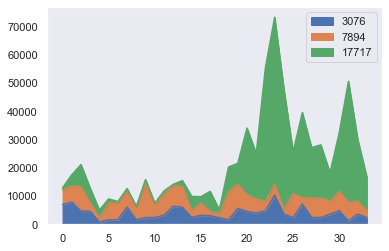

In [85]:
new_df.plot.area()
plt.show()

### Exercise 5:
Randomly choose 1 shop, use `pie plot figure` to show the contribution of turnover (in percent) of each item in 3 years 2013, 2014, and 2015. (1 pie plot figure for each year, use `subplots` to put all 3 figures together)

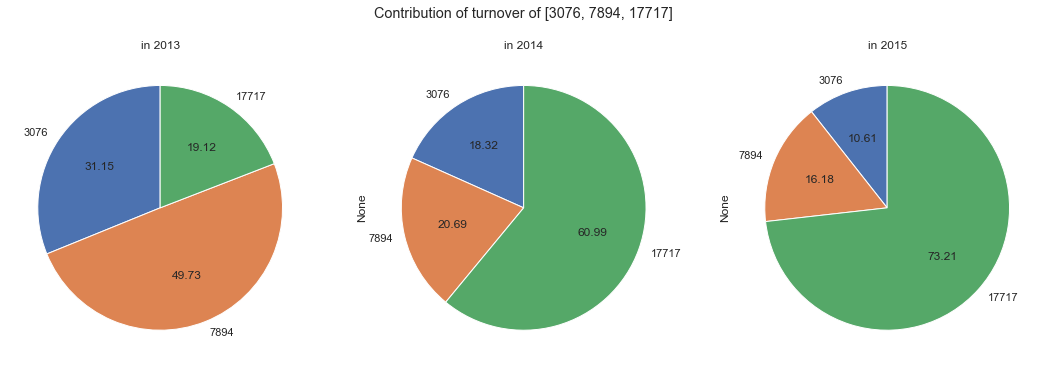

In [129]:
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

new_df[:12].sum().plot(ax=ax[0], kind='pie', startangle=90, autopct='%.2f', title='in 2013', ylabel='')
new_df[12:24].sum().plot(ax=ax[1], kind='pie', startangle=90, autopct='%.2f', title='in 2014', ylabel='')
new_df[24:].sum().plot(ax=ax[2], kind='pie', startangle=90, autopct='%.2f', title='in 2015', ylabel='')

plt.suptitle(f'Contribution of turnover of {item_id_list}', horizontalalignment='center', verticalalignment='bottom')
plt.tight_layout()
plt.show()

### Exercise 6:
Randomly choose 1 item, use `histogram figure` to show the distribution of sales of the item over 34 months (from January 2013 is 0, February 2013 is 1,..., October 2015 is 33.)

In [88]:
np.random.seed(0)
random_item_id = np.random.choice(sales_df.item_id.unique(), size=1)
random_item_id

array([11484])

In [91]:
item_df = sales_df[sales_df.item_id == random_item_id[0]]
item_count = item_df.groupby(by='date').agg({'item_cnt_day': sum}).reset_index()
item_count

,date,item_cnt_day
0,01.03.2013,1.0
1,01.04.2013,2.0
2,01.05.2013,5.0
3,01.06.2013,4.0
4,01.07.2014,1.0
...,...,...
454,31.08.2013,1.0
455,31.08.2014,2.0
456,31.10.2014,1.0
457,31.12.2013,2.0


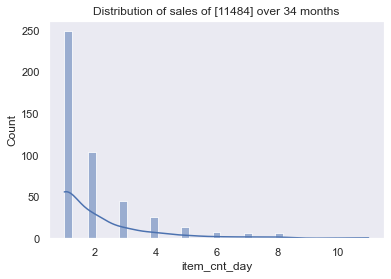

In [92]:
sns.histplot(x='item_cnt_day', data=item_count, kde=True)
plt.title(f'Distribution of sales of {random_item_id} over 34 months')
plt.show()